###Mobile Price Classification

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data = pd.read_csv('/content/train.csv')
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


##Data Exploration

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [152]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [153]:
print(data['price_range'].unique())
print(data['price_range'].value_counts())

[1 2 3 0]
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


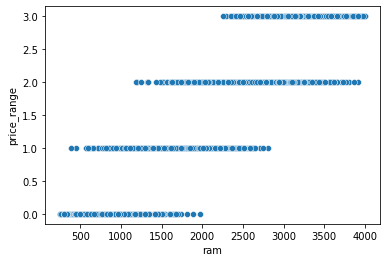

In [154]:
sns.scatterplot(data['ram'],data['price_range'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


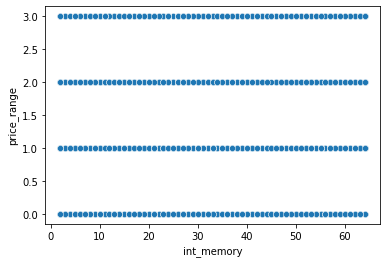

In [155]:
sns.scatterplot(data['int_memory'],data['price_range'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


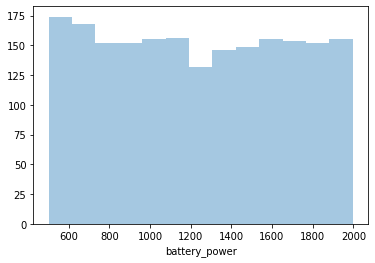

In [156]:
sns.distplot(a = data['battery_power'],kde=False)

##Feature Selection and Preprocessing

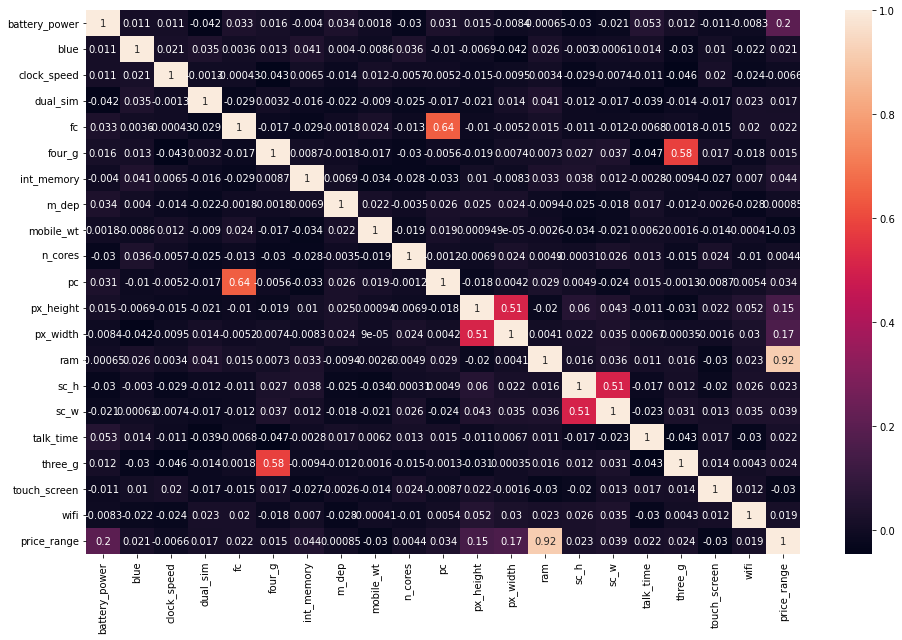

In [157]:
corr_matrix = data.corr()
features = corr_matrix.index

plt.figure(figsize = [16,10])
sns.heatmap(data[features].corr(),annot = True)

In [158]:
data.drop(['clock_speed','touch_screen','mobile_wt'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   dual_sim       2000 non-null   int64  
 3   fc             2000 non-null   int64  
 4   four_g         2000 non-null   int64  
 5   int_memory     2000 non-null   int64  
 6   m_dep          2000 non-null   float64
 7   n_cores        2000 non-null   int64  
 8   pc             2000 non-null   int64  
 9   px_height      2000 non-null   int64  
 10  px_width       2000 non-null   int64  
 11  ram            2000 non-null   int64  
 12  sc_h           2000 non-null   int64  
 13  sc_w           2000 non-null   int64  
 14  talk_time      2000 non-null   int64  
 15  three_g        2000 non-null   int64  
 16  wifi           2000 non-null   int64  
 17  price_range    2000 non-null   int64  
dtypes: float

In [159]:
X = data.drop(['price_range'],axis=1)
Y = data['price_range']

In [160]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
X = sc_x.fit_transform(X)

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.1)

##Modelling and comparsion

In [162]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [163]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=100,criterion = "entropy")
model_1.fit(X_train,Y_train)
pred_1 = model_1.predict(X_val)

In [164]:
print("Accuracy Score of RF Classifier is: ",accuracy_score(Y_val,pred_1))
print("\nConfusion Matrix of RF Classifier is:\n",confusion_matrix(Y_val,pred_1))
print("F1 Score of RF Classifier is: ",f1_score(Y_val,pred_1,average = 'macro'))

Accuracy Score of RF Classifier is:  0.875

Confusion Matrix of RF Classifier is:
 [[56  0  0  0]
 [ 4 43  4  0]
 [ 0  7 39  5]
 [ 0  0  5 37]]
F1 Score of RF Classifier is:  0.8714583896813327


In [165]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
model_2 = AdaBoostClassifier(n_estimators=100,base_estimator= DecisionTreeClassifier(criterion="entropy"),learning_rate=1)
model_2.fit(X_train,Y_train)
pred_2 = model_2.predict(X_val)

In [166]:
print("Accuracy Score of Adaptive Boost Classifier is: ",accuracy_score(Y_val,pred_2))
print("\nConfusion Matrix of Adaptive Boost Classifier is:\n",confusion_matrix(Y_val,pred_2))
print("F1 Score of RF Classifier is: ",f1_score(Y_val,pred_2,average = 'macro'))

Accuracy Score of Adaptive Boost Classifier is:  0.9

Confusion Matrix of Adaptive Boost Classifier is:
 [[55  1  0  0]
 [ 5 42  4  0]
 [ 0  3 45  3]
 [ 0  0  4 38]]
F1 Score of RF Classifier is:  0.8988256273748223


In [167]:
import xgboost
from xgboost import XGBClassifier
model_3 = XGBClassifier()
model_3.fit(X_train,Y_train)
pred_3 = model_3.predict(X_val)

In [168]:
print("Accuracy Score of XG Boost Classifier is: ",accuracy_score(Y_val,pred_3))
print("\nConfusion Matrix of XG Boost Classifier is:\n",confusion_matrix(Y_val,pred_3))
print("F1 Score of XG Classifier is: ",f1_score(Y_val,pred_3,average = 'macro'))

Accuracy Score of XG Boost Classifier is:  0.895

Confusion Matrix of XG Boost Classifier is:
 [[55  1  0  0]
 [ 4 44  3  0]
 [ 0  6 43  2]
 [ 0  0  5 37]]
F1 Score of XG Classifier is:  0.8939960847462979


In [169]:
from sklearn.svm import SVC
model_4 = SVC(kernel="linear")
model_4.fit(X_train,Y_train)
pred_4 = model_4.predict(X_val)

In [170]:
print("Accuracy Score of Support Vector Classifier is: ",accuracy_score(Y_val,pred_4))
print("\nConfusion Matrix of Support Vector Classifier is:\n",confusion_matrix(Y_val,pred_4))
print("F1 Score of Support Vector Classifier is: ",f1_score(Y_val,pred_4,average = 'macro'))

Accuracy Score of Support Vector Classifier is:  0.95

Confusion Matrix of Support Vector Classifier is:
 [[55  1  0  0]
 [ 3 48  0  0]
 [ 0  0 49  2]
 [ 0  0  4 38]]
F1 Score of Support Vector Classifier is:  0.9485123103255324


In [171]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier(n_neighbors=3,p=1)
model_5.fit(X_train,Y_train)
pred_5 = model_5.predict(X_val)

In [172]:
print("Accuracy Score of KNN Classifier is: ",accuracy_score(Y_val,pred_5))
print("\nConfusion Matrix of KNN Classifier is:\n",confusion_matrix(Y_val,pred_5))
print("F1 Score of KNN Classifier is: ",f1_score(Y_val,pred_5,average = 'macro'))

Accuracy Score of KNN Classifier is:  0.49

Confusion Matrix of KNN Classifier is:
 [[42 11  3  0]
 [17 23  8  3]
 [17 15 10  9]
 [ 1 10  8 23]]
F1 Score of KNN Classifier is:  0.47429084073820915


From our experimentation it is clear that support vector classifier with linear kernel is the best model for this problem.

Now we import our test data and classify it using Support Vector Classifier.

##Classifying Test Data

In [173]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [174]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [175]:
test_data.drop(['id','clock_speed','touch_screen','mobile_wt'],axis=1,inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   dual_sim       1000 non-null   int64  
 3   fc             1000 non-null   int64  
 4   four_g         1000 non-null   int64  
 5   int_memory     1000 non-null   int64  
 6   m_dep          1000 non-null   float64
 7   n_cores        1000 non-null   int64  
 8   pc             1000 non-null   int64  
 9   px_height      1000 non-null   int64  
 10  px_width       1000 non-null   int64  
 11  ram            1000 non-null   int64  
 12  sc_h           1000 non-null   int64  
 13  sc_w           1000 non-null   int64  
 14  talk_time      1000 non-null   int64  
 15  three_g        1000 non-null   int64  
 16  wifi           1000 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 132.9 KB


In [176]:
final_dataset = test_data.copy()
test_data = sc_x.fit_transform(test_data)

In [177]:
final_predictions = model_4.predict(test_data)
final_dataset['price_range'] = final_predictions
final_dataset.head(10)

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,1043,1,1,14,0,5,0.1,3,16,226,1412,3476,12,7,2,0,0,3
1,841,1,1,4,1,61,0.8,5,12,746,857,3895,6,0,7,1,0,3
2,1807,1,0,1,0,27,0.9,3,4,1270,1366,2396,17,10,10,0,1,2
3,1546,0,1,18,1,25,0.5,8,20,295,1752,3893,10,0,7,1,0,3
4,1434,0,0,11,1,49,0.5,6,18,749,810,1773,15,8,7,1,1,1
5,1464,1,1,5,1,50,0.8,8,9,569,939,3506,10,7,3,1,1,3
6,1718,0,0,1,0,47,1.0,2,3,1283,1374,3873,14,2,10,0,0,3
7,833,0,1,0,0,62,0.8,1,2,1312,1880,1495,7,2,18,0,1,1
8,1111,1,1,9,1,25,0.6,5,19,556,876,3485,11,9,10,1,0,3
9,1520,0,0,1,0,25,0.5,3,20,52,1009,651,6,0,5,1,1,0


In [185]:
final_dataset.to_csv("Test_predictions.csv",index = False)

In [184]:
import pickle
with open("Mobile_Price_SVC.pickle","wb") as f:
    pickle.dump(model_4,f)